#  LOAN APPLICATION STATUS PREDICTION

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# income dataset
loan=pd.read_csv("loan_prediction.csv")
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [34]:
loan.shape

(614, 13)

In [28]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [29]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [30]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Label Encoding:

In [3]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

loan['Loan_ID']=le.fit_transform(loan['Loan_ID'])
loan['Gender']=le.fit_transform(loan['Gender'])
loan['Married']=le.fit_transform(loan['Married'])
loan['Dependents']=le.fit_transform(loan['Dependents'])
loan['Education']=le.fit_transform(loan['Education'])
loan['Self_Employed']=le.fit_transform(loan['Self_Employed'])
loan['Property_Area']=le.fit_transform(loan['Property_Area'])
loan['Loan_Status']=le.fit_transform(loan['Loan_Status'])

loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# Filling null Values:

In [4]:
import numpy as np
loan=loan.replace(np.NaN,loan['Gender'].mode())
loan=loan.replace(np.NaN,loan['Married'].mode())
loan=loan.replace(np.NaN,loan['Dependents'].mode())
loan=loan.replace(np.NaN,loan['Self_Employed'].mode())
loan=loan.replace(np.NaN,loan['LoanAmount'].mean())
loan=loan.replace(np.NaN,loan['Loan_Amount_Term'].mean())
loan=loan.replace(np.NaN,loan['Credit_History'].mean())

In [5]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [63]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA:

Visualization:

<AxesSubplot:xlabel='Loan_ID'>

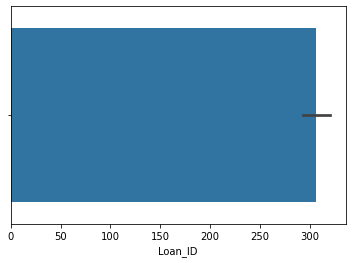

In [11]:
sns.barplot(loan['Loan_ID'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

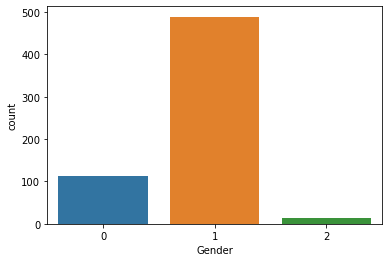

In [12]:
sns.countplot(loan['Gender'])

We can see from the above graph that most of the applicants are male.

<AxesSubplot:xlabel='Married', ylabel='count'>

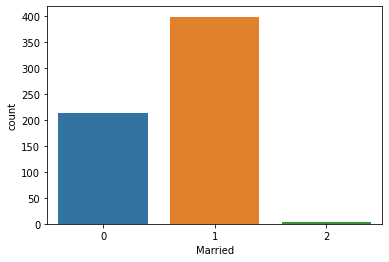

In [13]:
sns.countplot(loan['Married'])

We can see from the above graph that most of the applicants are married.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

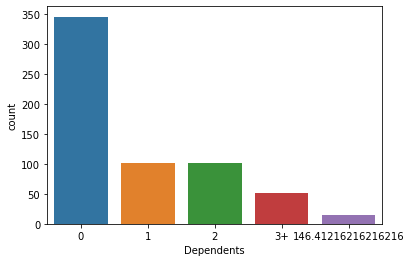

In [14]:
sns.countplot(loan['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

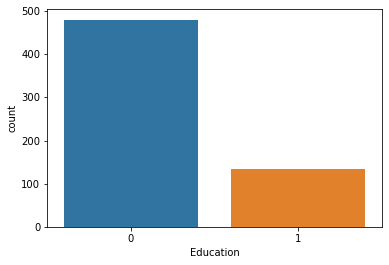

In [15]:
sns.countplot(loan['Education'])

We can see that most of the applicants are graduate.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

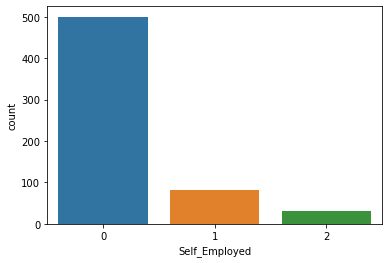

In [16]:
sns.countplot(loan['Self_Employed'])

We can see from the above graph that most of the applicants are Self_Employed.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

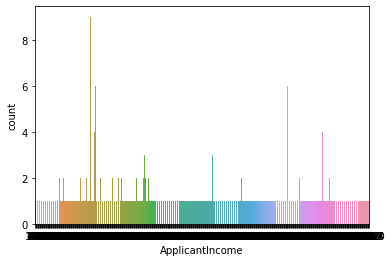

In [17]:
sns.countplot(loan['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='count'>

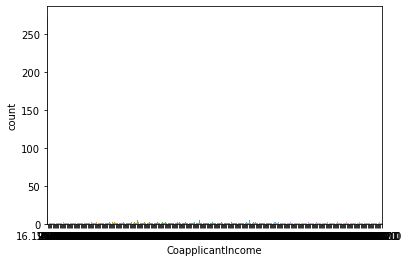

In [18]:
sns.countplot(loan['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

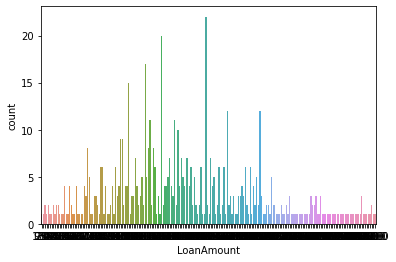

In [19]:
sns.countplot(loan['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

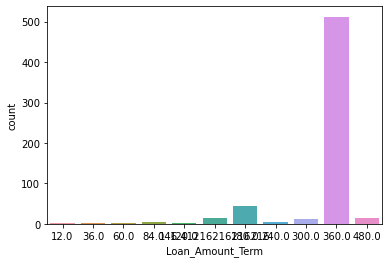

In [20]:
sns.countplot(loan['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

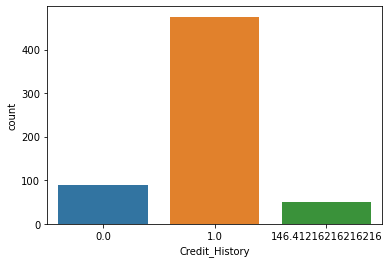

In [21]:
sns.countplot(loan['Credit_History'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

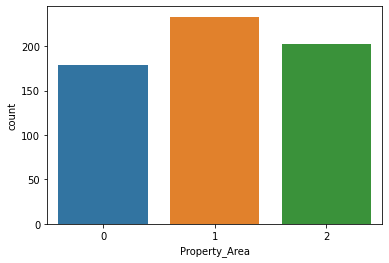

In [22]:
sns.countplot(loan['Property_Area'])

We can see from the above graph that most of the applicants are from the semiurban area.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

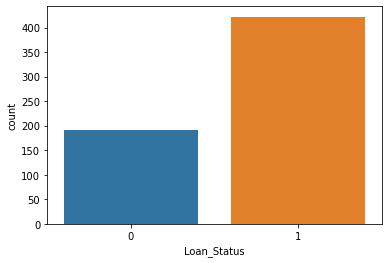

In [23]:
sns.countplot(loan['Loan_Status'])

We can see from the above graph that number of applicants loan getting approved is high .

# Correlation:

In [6]:
loan.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.007403,-0.018621,0.055139,0.039442,0.005039,0.016925,0.039211,0.035684,0.014326,0.012616,-0.155416,0.011773
Gender,-0.007403,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.073308,0.136081,-0.053770,-0.027391,-0.030903,0.008690
Married,-0.018621,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.069877,0.145541,-0.085676,0.038197,0.007973,0.096657
Dependents,0.055139,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,0.011146,0.130722,-0.051836,-0.049084,0.032600,-0.007318
Education,0.039442,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.062290,-0.166998,-0.102484,0.029417,-0.065243,-0.085884
Self_Employed,0.005039,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,0.052218,0.089806,-0.039324,0.079710,-0.013439,0.010880
ApplicantIncome,0.016925,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.116605,0.565620,-0.028038,-0.034777,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.073308,0.069877,0.011146,-0.062290,0.052218,-0.116605,1.000000,0.187828,-0.056719,0.104278,0.010522,-0.059187
LoanAmount,0.035684,0.136081,0.145541,0.130722,-0.166998,0.089806,0.565620,0.187828,1.000000,0.058038,0.050906,-0.044776,-0.036416
Loan_Amount_Term,0.014326,-0.053770,-0.085676,-0.051836,-0.102484,-0.039324,-0.028038,-0.056719,0.058038,1.000000,0.012157,-0.084868,-0.003319


Correlation using heatmap:

<AxesSubplot:>

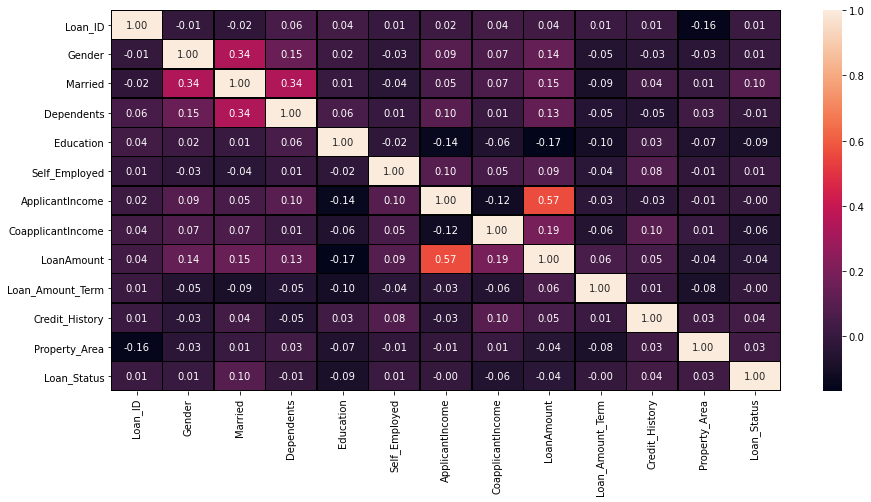

In [7]:
plt.figure(figsize=(15,7))
sns.heatmap(loan.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='.2f')

Outcome of correlation:

# Describe of Dataset:

In [8]:
loan.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,146.412162,337.540342,12.696430,1.037459,0.687296
std,177.390811,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,84.037468,70.693522,39.847275,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,146.412162,2.000000,1.000000


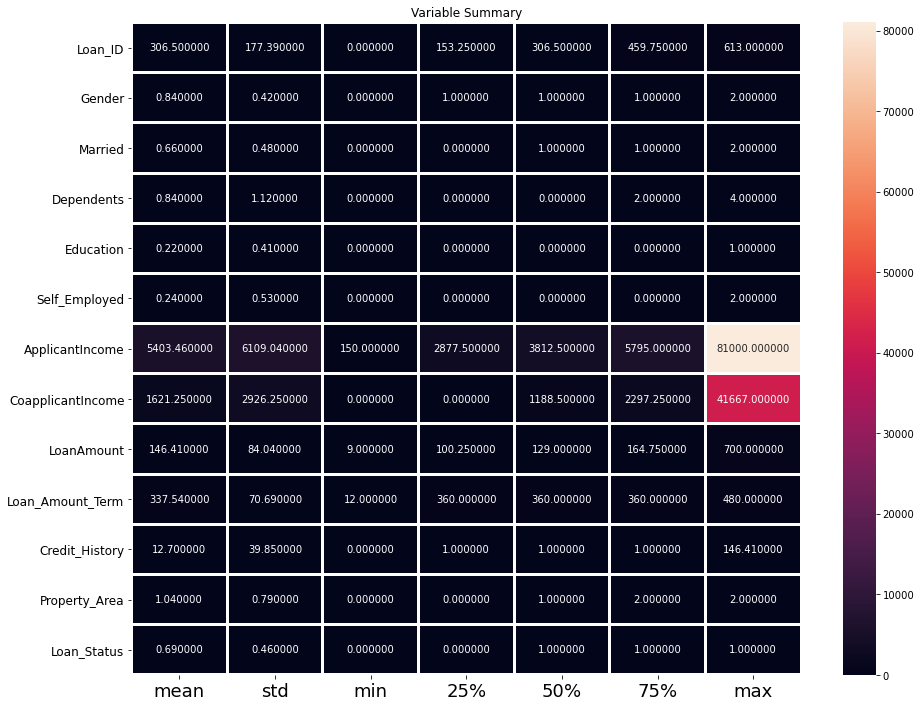

In [9]:
plt.figure(figsize=(15,12))
sns.heatmap(round(loan.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

Outcome Of Desrcribe of Dataset:

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 45.7+ KB


# Outliers Checking:

Box Plot:

<AxesSubplot:>

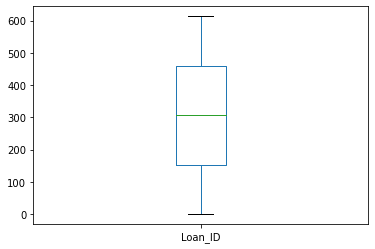

In [12]:
loan['Loan_ID'].plot.box()

<AxesSubplot:>

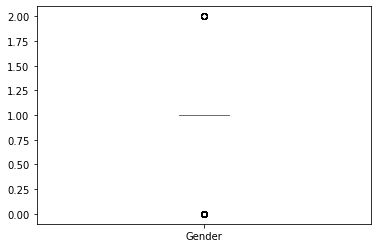

In [13]:
loan['Gender'].plot.box()

<AxesSubplot:>

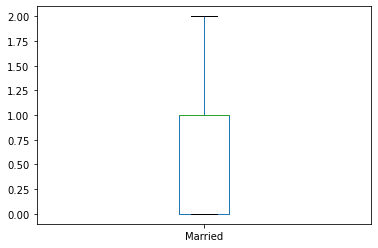

In [14]:
loan['Married'].plot.box()

<AxesSubplot:>

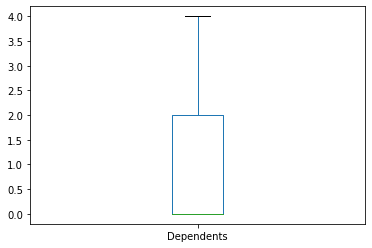

In [34]:
loan['Dependents'].plot.box()

<AxesSubplot:>

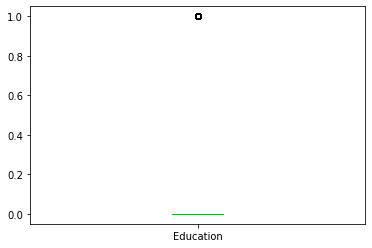

In [16]:
loan['Education'].plot.box()

<AxesSubplot:>

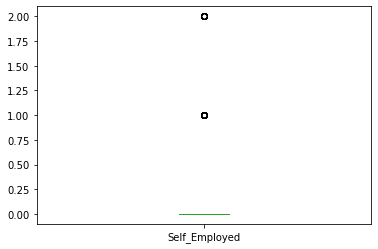

In [17]:
loan['Self_Employed'].plot.box()

<AxesSubplot:>

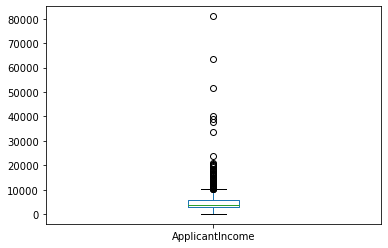

In [18]:
loan['ApplicantIncome'].plot.box()

<AxesSubplot:>

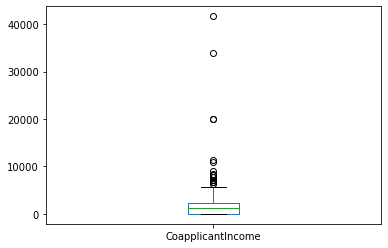

In [19]:
loan['CoapplicantIncome'].plot.box()

<AxesSubplot:>

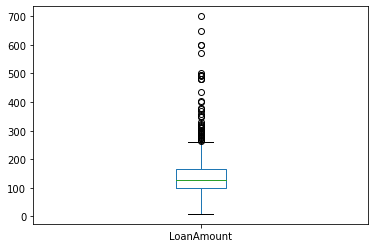

In [20]:
loan['LoanAmount'].plot.box()

<AxesSubplot:>

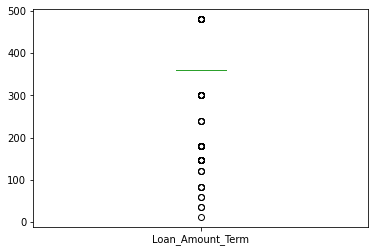

In [21]:
loan['Loan_Amount_Term'].plot.box()

<AxesSubplot:>

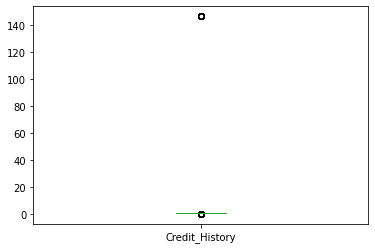

In [22]:
loan['Credit_History'].plot.box()

<AxesSubplot:>

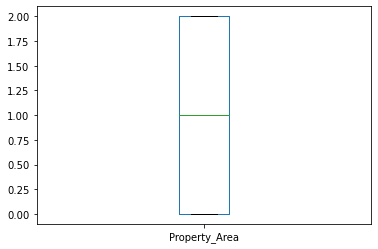

In [23]:
loan['Property_Area'].plot.box()

<AxesSubplot:>

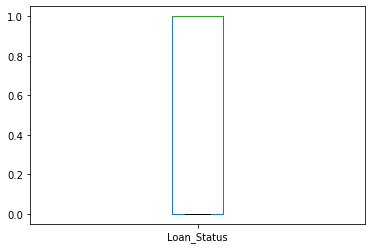

In [24]:
loan['Loan_Status'].plot.box()

From the above outcome we can see that

Columns[ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term] has more outliers,

Columns[Gender,Education,Self_Employed] has less outliers

and Columns[Loan_ID,Married,Dependents,Property_Area,Loan_Status] has no outliers.

# Skewness:

In [10]:
loan.skew()

Loan_ID              0.000000
Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.099403
Credit_History       3.067902
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Outcome of skewness:

Skewness threshold is taken as +/-0.5.

# Normal Distribution Curve:

<AxesSubplot:xlabel='Loan_ID', ylabel='Density'>

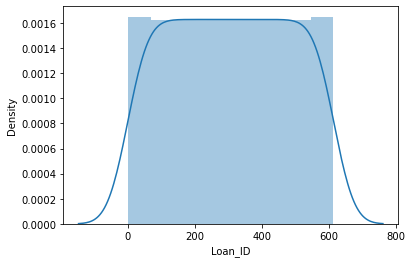

In [37]:
sns.distplot(loan['Loan_ID'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='Gender', ylabel='Density'>

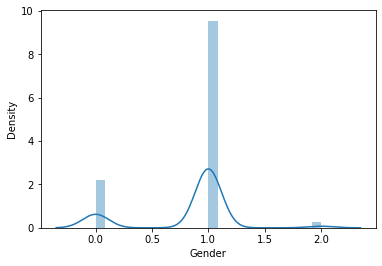

In [38]:
sns.distplot(loan['Gender'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='Married', ylabel='Density'>

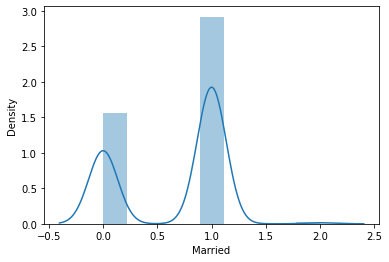

In [39]:
sns.distplot(loan['Married'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

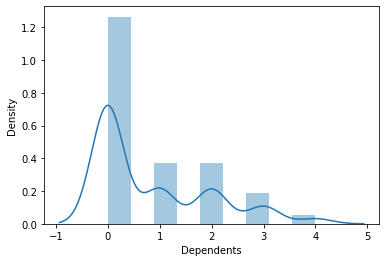

In [40]:
sns.distplot(loan['Dependents'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='Education', ylabel='Density'>

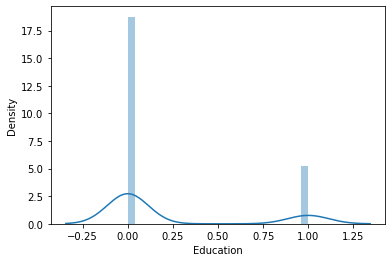

In [41]:
sns.distplot(loan['Education'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='Self_Employed', ylabel='Density'>

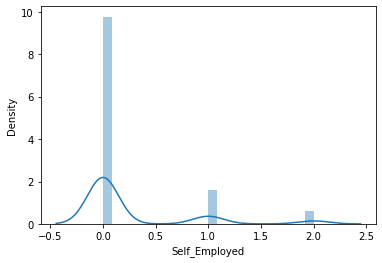

In [42]:
sns.distplot(loan['Self_Employed'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

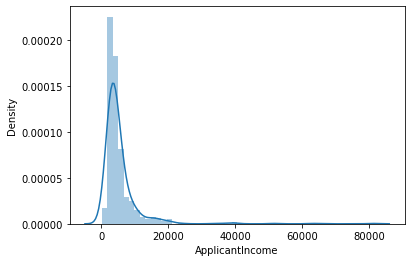

In [43]:
sns.distplot(loan['ApplicantIncome'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

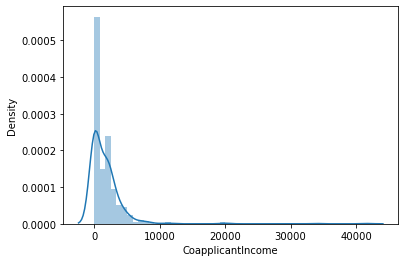

In [44]:
sns.distplot(loan['CoapplicantIncome'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

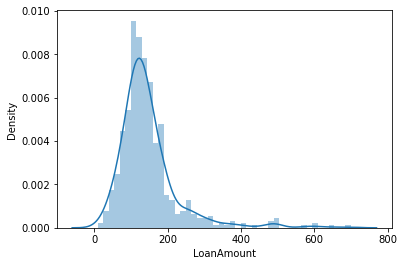

In [45]:
sns.distplot(loan['LoanAmount'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

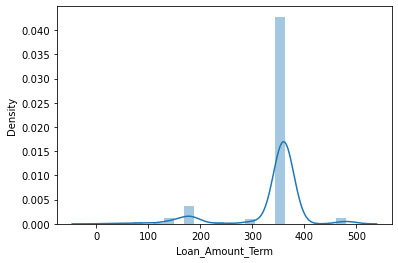

In [46]:
sns.distplot(loan['Loan_Amount_Term'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

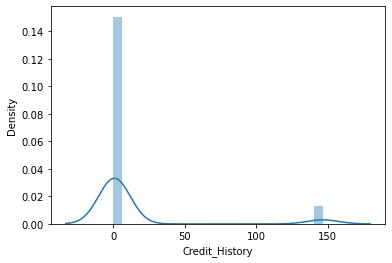

In [47]:
sns.distplot(loan['Credit_History'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

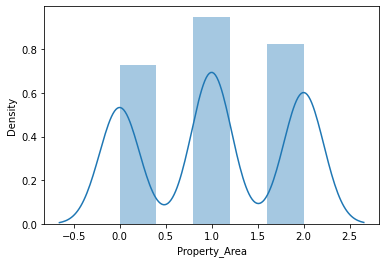

In [48]:
sns.distplot(loan['Property_Area'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

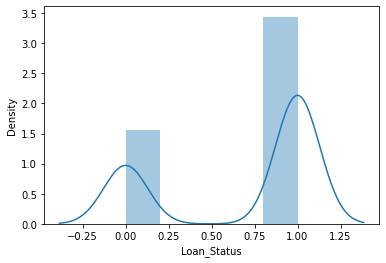

In [49]:
sns.distplot(loan['Loan_Status'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

# Data Cleaning:

In [11]:
loan=loan.drop(["Loan_ID","Gender"],axis=1)

In [12]:
loan

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


# Removing Outliers:

# z-Score Technique:

In [13]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(loan))
z.shape

(614, 11)

In [14]:
threshold=3
print(np.where(z>3))

(array([  9,  11,  14,  16,  19,  24,  24,  29,  30,  30,  42,  68,  79,
        83,  86,  94,  95,  95, 107, 111, 114, 117, 125, 126, 129, 130,
       130, 133, 155, 155, 156, 158, 170, 171, 171, 177, 177, 181, 183,
       185, 187, 198, 218, 219, 231, 236, 236, 237, 242, 259, 260, 262,
       268, 278, 279, 295, 308, 309, 313, 313, 317, 318, 323, 333, 333,
       333, 336, 344, 348, 363, 369, 374, 377, 380, 385, 392, 395, 402,
       409, 411, 411, 417, 432, 432, 443, 444, 447, 449, 451, 460, 463,
       468, 473, 487, 490, 491, 495, 497, 497, 503, 506, 506, 523, 525,
       530, 533, 535, 542, 544, 546, 556, 561, 565, 575, 579, 581, 583,
       585, 600, 600, 600, 601, 604], dtype=int64), array([5, 3, 7, 8, 3, 3, 8, 3, 3, 8, 8, 7, 8, 8, 8, 7, 3, 8, 3, 3, 3, 8,
       8, 4, 8, 6, 8, 7, 4, 6, 8, 3, 3, 4, 6, 5, 6, 8, 4, 4, 8, 8, 3, 8,
       3, 3, 8, 8, 7, 8, 8, 7, 3, 6, 8, 3, 6, 8, 7, 8, 8, 8, 8, 3, 4, 6,
       3, 3, 8, 8, 6, 3, 8, 3, 3, 8, 8, 5, 4, 3, 8, 5, 3, 6, 4, 8, 3, 8,
       

In [15]:
loan_new=loan[(z<3).all(axis=1)]
print(loan.shape)
print(loan_new.shape)

(614, 11)
(508, 11)


# Percentage Data Loss:

In [16]:
percentage_loss=(614-508)/614*100
print(percentage_loss)

17.263843648208468


# IQR Technique:

In [17]:
Q1 = loan.quantile(0.25)
Q3 = loan.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Married                 1.00
Dependents              2.00
Education               0.00
Self_Employed           0.00
ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
Loan_Amount_Term        0.00
Credit_History          0.00
Property_Area           2.00
Loan_Status             1.00
dtype: float64


In [18]:
loan_new1= loan[~((loan < (Q1 - 1.5 * IQR)) |(loan > (Q3 + 1.5 * IQR))).any(axis=1)]
print(loan_new1.shape)

(234, 11)


Percentage Data Loss:

In [19]:
percentage_loss=((614-234)/614)*100
print(percentage_loss)

61.88925081433225


The percentage loss in the z-score is less, so we prefer z-score over IQR.

# Dividing dataframe into feature and target:

In [20]:
x=loan_new.iloc[:,:-1]
y=loan_new.iloc[:,-1]

In [23]:
y.value_counts()

1    345
0    163
Name: Loan_Status, dtype: int64

In [24]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
xtrain,ytrain=sm.fit_resample(x,y)

In [25]:
ytrain.value_counts()

0    345
1    345
Name: Loan_Status, dtype: int64

# Transforming data to remove skewness:

In [26]:
from sklearn.preprocessing import power_transform
xtrain=power_transform(xtrain,method='yeo-johnson')
xtrain

array([[-1.16657747, -0.81843434, -0.4795274 , ...,  0.16051688,
         0.655418  ,  1.27895294],
       [ 0.82496996,  0.87573784, -0.4795274 , ...,  0.16051688,
         0.655418  , -1.27981835],
       [ 0.82496996, -0.81843434, -0.4795274 , ...,  0.16051688,
         0.655418  ,  1.27895294],
       ...,
       [-1.16657747,  0.87573784, -0.4795274 , ...,  0.16051688,
         0.655418  , -1.27981835],
       [ 0.82496996,  1.32673528, -0.4795274 , ...,  0.16051688,
         0.46809604, -1.27981835],
       [-1.16657747,  0.87573784, -0.4795274 , ...,  0.16051688,
        -1.03104418,  0.16468474]])

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtrain

array([[-1.16657747, -0.81843434, -0.4795274 , ...,  0.16051688,
         0.655418  ,  1.27895294],
       [ 0.82496996,  0.87573784, -0.4795274 , ...,  0.16051688,
         0.655418  , -1.27981835],
       [ 0.82496996, -0.81843434, -0.4795274 , ...,  0.16051688,
         0.655418  ,  1.27895294],
       ...,
       [-1.16657747,  0.87573784, -0.4795274 , ...,  0.16051688,
         0.655418  , -1.27981835],
       [ 0.82496996,  1.32673528, -0.4795274 , ...,  0.16051688,
         0.46809604, -1.27981835],
       [-1.16657747,  0.87573784, -0.4795274 , ...,  0.16051688,
        -1.03104418,  0.16468474]])

# MODEL BUILDING:

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Logistic Regression:

In [29]:
for i in range(0,1000):
    train_x,test_x,train_y,test_y=train_test_split(xtrain,ytrain,test_size=0.20,random_state=i)
    lg.fit(train_x,train_y)
    pred_train=lg.predict(train_x)
    pred_test=lg.predict(test_x)
    if round(accuracy_score(train_y,pred_train)*100,1)==round(accuracy_score(test_y,pred_test)*100,1):
        print("At random state",i,"The model performs well")
        print("At random state:",i)
        print("Training Accuracy:",accuracy_score(train_y,pred_train)*100)
        print("Testing Accuracy:",accuracy_score(test_y,pred_test)*100)

At random state 7 The model performs well
At random state: 7
Training Accuracy: 80.43478260869566
Testing Accuracy: 80.43478260869566
At random state 24 The model performs well
At random state: 24
Training Accuracy: 78.98550724637681
Testing Accuracy: 78.98550724637681
At random state 73 The model performs well
At random state: 73
Training Accuracy: 80.43478260869566
Testing Accuracy: 80.43478260869566
At random state 134 The model performs well
At random state: 134
Training Accuracy: 79.71014492753623
Testing Accuracy: 79.71014492753623
At random state 149 The model performs well
At random state: 149
Training Accuracy: 78.98550724637681
Testing Accuracy: 78.98550724637681
At random state 154 The model performs well
At random state: 154
Training Accuracy: 78.98550724637681
Testing Accuracy: 78.98550724637681
At random state 216 The model performs well
At random state: 216
Training Accuracy: 79.71014492753623
Testing Accuracy: 79.71014492753623
At random state 324 The model performs wel

In [30]:
train_x,test_x,train_y,test_y=train_test_split(xtrain,ytrain,test_size=0.20,random_state=73)
print("Classification Report:",classification_report(test_y,pred_test))
print("Confusion Matrix:",confusion_matrix(test_y,pred_test))

Classification Report:               precision    recall  f1-score   support

           0       0.58      0.46      0.51        70
           1       0.54      0.66      0.60        68

    accuracy                           0.56       138
   macro avg       0.56      0.56      0.55       138
weighted avg       0.56      0.56      0.55       138

Confusion Matrix: [[32 38]
 [23 45]]


Cross validation score for Logistic Regression:

In [31]:
from sklearn.model_selection import cross_val_score

lg.fit(train_x,train_y)
lg.score(train_x,train_y)
pred_lg = lg.predict(test_x)

lss = accuracy_score(test_y,pred_lg)
for j in range(2,10):
    lsscore = cross_val_score(lg,xtrain,ytrain,cv=j)
    ls_cv = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",ls_cv*100 )
    print("Accuracy score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 77.39130434782608
Accuracy score is :- 80.43478260869566


At cv:- 3
Cross validation score is:- 77.97101449275362
Accuracy score is :- 80.43478260869566


At cv:- 4
Cross validation score is:- 78.56398709503966
Accuracy score is :- 80.43478260869566


At cv:- 5
Cross validation score is:- 78.40579710144927
Accuracy score is :- 80.43478260869566


At cv:- 6
Cross validation score is:- 78.84057971014494
Accuracy score is :- 80.43478260869566


At cv:- 7
Cross validation score is:- 78.57142857142857
Accuracy score is :- 80.43478260869566


At cv:- 8
Cross validation score is:- 78.57357658380113
Accuracy score is :- 80.43478260869566


At cv:- 9
Cross validation score is:- 78.71003265740109
Accuracy score is :- 80.43478260869566




In [32]:
print("At cv:",6)
print("Cross validation score is:",78.84057971014494 )
print("Accuracy score is :",80.43478260869566)

At cv: 6
Cross validation score is: 78.84057971014494
Accuracy score is : 80.43478260869566


The value of cv taken is 6.

# Approaching more classifiers:

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# 1.Decision Tree Classifier:

In [34]:
parameters = {'criterion':['gini', 'entropy'],'splitter':['best','random']}
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'gini', 'splitter': 'best'}


In [35]:
dtc = DecisionTreeClassifier(criterion='gini', splitter='best')
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
pred_dtc = dtc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_dtc)*100)
print("Classification report:",classification_report(test_y,pred_dtc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_dtc)*100)

dtc_score = cross_val_score(dtc,xtrain,ytrain,cv=6)
dtc_cc = dtc_score.mean() 
print('Cross Val Score:',dtc_cc*100)

Accuracy Score: 77.53623188405797
Classification report:               precision    recall  f1-score   support

           0       0.74      0.86      0.79        70
           1       0.82      0.69      0.75        68

    accuracy                           0.78       138
   macro avg       0.78      0.77      0.77       138
weighted avg       0.78      0.78      0.77       138
              precision    recall  f1-score   support

           0       0.74      0.86      0.79        70
           1       0.82      0.69      0.75        68

    accuracy                           0.78       138
   macro avg       0.78      0.77      0.77       138
weighted avg       0.78      0.78      0.77       138
              precision    recall  f1-score   support

           0       0.74      0.86      0.79        70
           1       0.82      0.69      0.75        68

    accuracy                           0.78       138
   macro avg       0.78      0.77      0.77       138
weighted avg       

# 2.KNeighbors Classifier:

In [36]:
parameters = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'algorithm': 'auto'}


In [37]:
knc = KNeighborsClassifier(algorithm='auto', n_neighbors=5)
knc.fit(train_x,train_y)
knc.score(train_x,train_y)
pred_knc = knc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_knc)*100)
print("Classification report:",classification_report(test_y,pred_knc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_knc)*100)

knc_score = cross_val_score(knc,xtrain,ytrain,cv=6)
knc_cc = knc_score.mean() 
print('Cross Val Score:',knc_cc*100)

Accuracy Score: 80.43478260869566
Classification report:               precision    recall  f1-score   support

           0       0.83      0.77      0.80        70
           1       0.78      0.84      0.81        68

    accuracy                           0.80       138
   macro avg       0.81      0.80      0.80       138
weighted avg       0.81      0.80      0.80       138
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        70
           1       0.78      0.84      0.81        68

    accuracy                           0.80       138
   macro avg       0.81      0.80      0.80       138
weighted avg       0.81      0.80      0.80       138
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        70
           1       0.78      0.84      0.81        68

    accuracy                           0.80       138
   macro avg       0.81      0.80      0.80       138
weighted avg       

# 3.SVC:

In [41]:
svc = SVC(kernel='rbf')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
pred_svc = svc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_svc)*100)
print("Classification report:",classification_report(test_y,pred_svc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_svc)*100)

svc_score = cross_val_score(svc,xtrain,ytrain,cv=6)
svc_cc = svc_score.mean() 
print('Cross Val Score:',svc_cc*100)

Accuracy Score: 81.88405797101449
Classification report:               precision    recall  f1-score   support

           0       0.91      0.71      0.80        70
           1       0.76      0.93      0.83        68

    accuracy                           0.82       138
   macro avg       0.83      0.82      0.82       138
weighted avg       0.84      0.82      0.82       138
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        70
           1       0.76      0.93      0.83        68

    accuracy                           0.82       138
   macro avg       0.83      0.82      0.82       138
weighted avg       0.84      0.82      0.82       138
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        70
           1       0.76      0.93      0.83        68

    accuracy                           0.82       138
   macro avg       0.83      0.82      0.82       138
weighted avg       

# ENSEMBLE METHODS:

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 1.Random Forest Classifier:

In [43]:
parameters = {'criterion':['gini', 'entropy'],'n_estimators':[100]}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'gini', 'n_estimators': 100}


In [44]:
rfc = RandomForestClassifier(criterion='gini', n_estimators=100)
rfc.fit(train_x,train_y)
rfc.score(train_x,train_y)
pred_rfc = rfc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_rfc)*100)
print("Classification report:",classification_report(test_y,pred_rfc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_rfc)*100)

rfc_score = cross_val_score(rfc,xtrain,ytrain,cv=6)
rfc_cc = rfc_score.mean() 
print('Cross Val Score:',rfc_cc*100)

Accuracy Score: 85.5072463768116
Classification report:               precision    recall  f1-score   support

           0       0.92      0.79      0.85        70
           1       0.81      0.93      0.86        68

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.85       138
weighted avg       0.86      0.86      0.85       138
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        70
           1       0.81      0.93      0.86        68

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.85       138
weighted avg       0.86      0.86      0.85       138
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        70
           1       0.81      0.93      0.86        68

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.85       138
weighted avg       0

# 2.Ada Boost Classifier:

In [45]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME')
abc.fit(train_x,train_y)
abc.score(train_x,train_y)
pred_abc = abc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_abc)*100)
print("Classification report:",classification_report(test_y,pred_abc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_abc)*100)

abc_score = cross_val_score(abc,xtrain,ytrain,cv=6)
abc_cc = abc_score.mean() 
print('Cross Val Score:',abc_cc*100)

Accuracy Score: 83.33333333333334
Classification report:               precision    recall  f1-score   support

           0       0.96      0.70      0.81        70
           1       0.76      0.97      0.85        68

    accuracy                           0.83       138
   macro avg       0.86      0.84      0.83       138
weighted avg       0.86      0.83      0.83       138
              precision    recall  f1-score   support

           0       0.96      0.70      0.81        70
           1       0.76      0.97      0.85        68

    accuracy                           0.83       138
   macro avg       0.86      0.84      0.83       138
weighted avg       0.86      0.83      0.83       138
              precision    recall  f1-score   support

           0       0.96      0.70      0.81        70
           1       0.76      0.97      0.85        68

    accuracy                           0.83       138
   macro avg       0.86      0.84      0.83       138
weighted avg       

# 3.Gradient Boosting Classifier:

In [46]:
gbc = GradientBoostingClassifier(criterion='mse', n_estimators=100, learning_rate=0.1, loss='deviance')
gbc.fit(train_x,train_y)
gbc.score(train_x,train_y)
pred_gbc = gbc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_gbc)*100)
print("Classification report:",classification_report(test_y,pred_gbc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_gbc)*100)

gbc_score = cross_val_score(gbc,xtrain,ytrain,cv=6)
gbc_cc = gbc_score.mean() 
print('Cross Val Score:',gbc_cc*100)

Accuracy Score: 84.05797101449275
Classification report:               precision    recall  f1-score   support

           0       0.93      0.74      0.83        70
           1       0.78      0.94      0.85        68

    accuracy                           0.84       138
   macro avg       0.85      0.84      0.84       138
weighted avg       0.86      0.84      0.84       138
              precision    recall  f1-score   support

           0       0.93      0.74      0.83        70
           1       0.78      0.94      0.85        68

    accuracy                           0.84       138
   macro avg       0.85      0.84      0.84       138
weighted avg       0.86      0.84      0.84       138
              precision    recall  f1-score   support

           0       0.93      0.74      0.83        70
           1       0.78      0.94      0.85        68

    accuracy                           0.84       138
   macro avg       0.85      0.84      0.84       138
weighted avg       

# 4.Voting Classifier:

In [47]:
from sklearn.ensemble import VotingClassifier

In [48]:
estimator=[]
estimator.append(('LR',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))

In [49]:
estimator

[('LR', KNeighborsClassifier()),
 ('SVC', SVC(gamma='auto', probability=True)),
 ('DTC', DecisionTreeClassifier())]

In [50]:
#voting classifier with hard voting
vot_hard=VotingClassifier(estimators=estimator,voting='hard')
vot_hard.fit(train_x,train_y)
y_pred=vot_hard.predict(test_x)
print(y_pred)
score=accuracy_score(test_y,y_pred)
print("Hard Voting Score %d" %score)

[0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1
 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1
 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1]
Hard Voting Score 0


In [51]:
#voting classifier with soft voting
vot_soft=VotingClassifier(estimators=estimator,voting='soft')
vot_soft.fit(train_x,train_y)
y_pred=vot_soft.predict(test_x)
print(y_pred)
score=accuracy_score(test_y,y_pred)
print("soft Voting Score %d" %score)

[0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1
 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1
 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1]
soft Voting Score 0


# The best model is Random Forest Classifier. Since the difference between the percentage score of cross validation and accuracy_score is optimum.

# AUC ROC Curve:

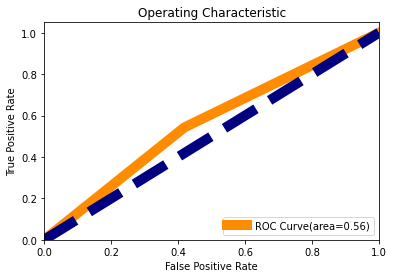

In [52]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,test_y)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Model Saving:

In [53]:
import pickle
filename='loan_application_status.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Conclusion:

In [54]:
import numpy as np
a=np.array(test_y)
predicted=np.array(rfc.predict(test_x))
loan_con=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
loan_con

,original,predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,1,0
...,...,...
133,1,1
134,0,0
135,0,0
136,0,0


# From the above table, the model is predicted with 85 percent accuracy.